<a href="https://colab.research.google.com/github/FranciscoMoralesActuary/Ventas-Videojuegos/blob/main/EDA_ventas_videojuegos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_excel("https://raw.githubusercontent.com/FranciscoMoralesActuary/Ventas-Videojuegos/main/Ventas%20Videojuegos.xlsx")
df

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16321,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16322,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16323,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16324,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16326 entries, 0 to 16325
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nombre         16326 non-null  object 
 1   Plataforma     16326 non-null  object 
 2   Año            16326 non-null  int64  
 3   Genero         16326 non-null  object 
 4   Editorial      16290 non-null  object 
 5   Ventas NA      16326 non-null  float64
 6   Ventas EU      16326 non-null  float64
 7   Ventas JP      16326 non-null  float64
 8   Ventas Otros   16326 non-null  float64
 9   Ventas Global  16326 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [10]:
pla=df['Plataforma'].unique()

In [11]:
len(pla)

31

In [24]:
df.sort_values(by='Año', ascending=True, inplace=True)
df.head()

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
540,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
6667,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2621,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
3965,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.0,0.01,0.49
1944,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05


In [28]:
edi=df["Editorial"].value_counts()
edi

,count
Editorial,
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,917
Konami Digital Entertainment,823
...,...
989 Sports,1
PopTop Software,1
Westwood Studios,1


In [34]:
prom_ventas=df.groupby('Editorial')['Ventas Global'].mean().sort_values(ascending=False)
prom_ventas.head(10)

,Ventas Global
Editorial,
Palcom,4.170000
Red Orb,2.620000
Nintendo,2.563836
Arena Entertainment,2.360000
UEP Systems,2.250000
RedOctane,2.170000
Valve,1.740000
Hello Games,1.600000
Sony Computer Entertainment Europe,1.592667


In [72]:
call.head()

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
495,Call of Duty: Finest Hour,PS2,2004,Shooter,Activision,1.51,1.12,0.01,0.24,2.89
4749,Call of Duty: Finest Hour,GC,2004,Shooter,Activision,0.31,0.08,0.00,0.01,0.40
1641,Call of Duty: Finest Hour,XB,2004,Shooter,Activision,0.78,0.40,0.00,0.04,1.21
830,Call of Duty 2,X360,2005,Shooter,Activision,1.81,0.05,0.01,0.15,2.02
12227,Call of Duty 2,PC,2005,Shooter,Activision,0.00,0.05,0.00,0.01,0.06


In [77]:
vc = call.groupby(['Nombre', 'Año'])['Ventas Global'].sum()
vc

,,Ventas Global
Nombre,Año,
Call of Duty 2,2005,2.08
Call of Duty 3,2006,5.30
Call of Duty 4: Modern Warfare,2007,18.25
Call of Duty Black Ops: Declassified,2012,1.69
Call of Duty: Advanced Warfare,2014,21.90
Call of Duty: Black Ops,2010,29.40
Call of Duty: Black Ops 3,2015,25.32
Call of Duty: Black Ops II,2012,29.72
Call of Duty: Finest Hour,2004,4.50


In [ ]:
gra=k.merge

In [140]:
ca['Nombre']='Call of Duty'
ca

,Nombre,Año,Ventas Global
0,Call of Duty,2005,2.08
1,Call of Duty,2006,5.30
2,Call of Duty,2007,18.25
3,Call of Duty,2012,1.69
4,Call of Duty,2014,21.90
5,Call of Duty,2010,29.40
6,Call of Duty,2015,25.32
7,Call of Duty,2012,29.72
8,Call of Duty,2004,4.50
9,Call of Duty,2013,27.38


In [142]:
k['Nombre']='FIFA'
k

,Nombre,Año,Ventas Global
0,FIFA,2002,0.83
1,FIFA,2010,3.00
2,FIFA,2014,1.18
3,FIFA,2005,0.14
4,FIFA,2005,0.15
5,FIFA,2011,13.15
6,FIFA,2013,17.14
7,FIFA,2014,19.02
8,FIFA,2015,16.44
9,FIFA,2016,6.91


In [143]:
gra=pd.concat([ca,k])
gra

,Nombre,Año,Ventas Global
0,Call of Duty,2005,2.08
1,Call of Duty,2006,5.30
2,Call of Duty,2007,18.25
3,Call of Duty,2012,1.69
4,Call of Duty,2014,21.90
...,...,...,...
38,FIFA,2006,1.57
39,FIFA,2006,0.03
40,FIFA,1997,0.58
41,FIFA,1997,0.73


In [154]:
gra2=gra[gra['Año']>2004]
gra2

,Nombre,Año,Ventas Global
0,Call of Duty,2005,2.08
1,Call of Duty,2006,5.30
2,Call of Duty,2007,18.25
3,Call of Duty,2012,1.69
4,Call of Duty,2014,21.90
5,Call of Duty,2010,29.40
6,Call of Duty,2015,25.32
7,Call of Duty,2012,29.72
9,Call of Duty,2013,27.38
10,Call of Duty,2009,25.09


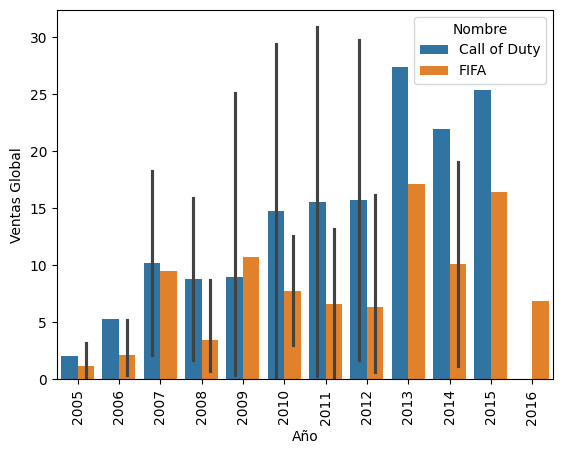

In [166]:

sns.barplot( x=gra2['Año'],
            y=gra2['Ventas Global'],
    data=gra2,
    hue=gra2['Nombre']
    )

plt.xticks(rotation=90)
plt.show()

<BarContainer object of 43 artists>

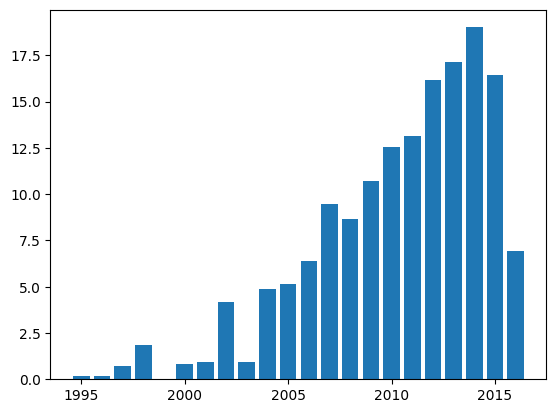

In [156]:
plt.bar(x=k['Año'],
        height=k['Ventas Global']
        )

<BarContainer object of 20 artists>

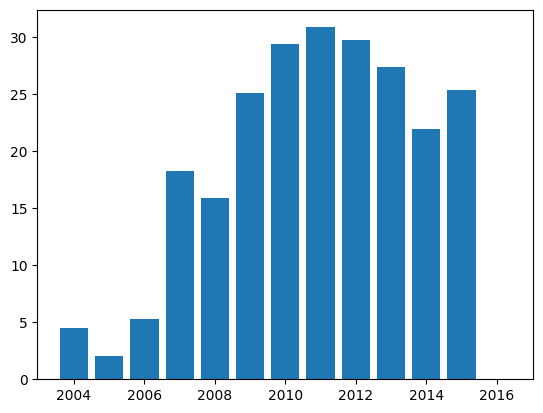

In [126]:
plt.bar(x=ca['Año'],
        height=ca['Ventas Global']
        )

In [125]:
ca=pd.DataFrame(data=vc
                )

ca.reset_index(inplace=True)

ca.shape

(20, 3)

In [108]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nombre         43 non-null     object 
 1   Año            43 non-null     int64  
 2   Ventas Global  43 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [106]:
k=pd.DataFrame ( data=vf
                )
k.reset_index(inplace=True)

k.columns

Index(['Nombre', 'Año', 'Ventas Global'], dtype='object')

In [123]:
vc=c.groupby(['Nombre', 'Año'])['Ventas Global'].sum()
vc

,,Ventas Global
Nombre,Año,
Call of Duty 2,2005,2.08
Call of Duty 3,2006,5.30
Call of Duty 4: Modern Warfare,2007,18.25
Call of Duty Black Ops: Declassified,2012,1.69
Call of Duty: Advanced Warfare,2014,21.90
Call of Duty: Black Ops,2010,29.40
Call of Duty: Black Ops 3,2015,25.32
Call of Duty: Black Ops II,2012,29.72
Call of Duty: Finest Hour,2004,4.50


In [93]:
vf=f.groupby(['Nombre', 'Año'])['Ventas Global'].sum()
vf

,,Ventas Global
Nombre,Año,
2002 FIFA World Cup,2002,0.83
2010 FIFA World Cup South Africa,2010,3.00
2014 FIFA World Cup Brazil,2014,1.18
FIFA 06 Soccer,2005,0.14
FIFA 06: Road to FIFA World Cup,2005,0.15
FIFA 12,2011,13.15
FIFA 14,2013,17.14
FIFA 15,2014,19.02
FIFA 16,2015,16.44


In [68]:
c=call[['Nombre','Ventas Global', 'Año']].groupby('Nombre')['Ventas Global'].sum()
c

,Ventas Global
Nombre,
Call of Duty 2,2.08
Call of Duty 3,5.30
Call of Duty 4: Modern Warfare,18.25
Call of Duty Black Ops: Declassified,1.69
Call of Duty: Advanced Warfare,21.90
Call of Duty: Black Ops,29.40
Call of Duty: Black Ops 3,25.32
Call of Duty: Black Ops II,29.72
Call of Duty: Finest Hour,4.50


In [60]:
call=df[df['Nombre'].str.contains('Call of Duty', na=False)]
call

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
495,Call of Duty: Finest Hour,PS2,2004,Shooter,Activision,1.51,1.12,0.01,0.24,2.89
4749,Call of Duty: Finest Hour,GC,2004,Shooter,Activision,0.31,0.08,0.00,0.01,0.40
1641,Call of Duty: Finest Hour,XB,2004,Shooter,Activision,0.78,0.40,0.00,0.04,1.21
830,Call of Duty 2,X360,2005,Shooter,Activision,1.81,0.05,0.01,0.15,2.02
12227,Call of Duty 2,PC,2005,Shooter,Activision,0.00,0.05,0.00,0.01,0.06
546,Call of Duty 3,X360,2006,Shooter,Activision,1.49,0.93,0.02,0.27,2.71
1223,Call of Duty 3,PS3,2006,Shooter,Activision,0.60,0.63,0.03,0.26,1.52
1906,Call of Duty 3,PS2,2006,Shooter,Activision,0.89,0.03,0.00,0.15,1.07
120,Call of Duty 4: Modern Warfare,PS3,2007,Shooter,Activision,3.10,2.30,0.28,1.04,6.72
1754,Call of Duty 4: Modern Warfare,PC,2007,Shooter,Activision,0.00,1.12,0.00,0.03,1.15


In [38]:
df

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
540,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
6667,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.24
2621,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
3965,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,0.49
1944,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
...,...,...,...,...,...,...,...,...,...,...
9825,Lego Star Wars: The Force Awakens,PS3,2016,Action,Warner Bros. Interactive Entertainment,0.03,0.07,0.00,0.02,0.12
11547,BioShock The Collection,XOne,2016,Shooter,Take-Two Interactive,0.03,0.04,0.00,0.01,0.08
16324,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16325,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [51]:
df.isnull().sum()

,0
Nombre,0
Plataforma,0
Año,0
Genero,0
Editorial,36
Ventas NA,0
Ventas EU,0
Ventas JP,0
Ventas Otros,0
Ventas Global,0


In [53]:
f = df[df['Nombre'].str.contains('FIFA', na=False)]
f

,Nombre,Plataforma,Año,Genero,Editorial,Ventas NA,Ventas EU,Ventas JP,Ventas Otros,Ventas Global
8332,FIFA Soccer 96,PS,1995,Sports,Electronic Arts,0.09,0.06,0.00,0.01,0.16
8335,FIFA Soccer 97,PS,1996,Sports,Electronic Arts,0.09,0.06,0.00,0.01,0.16
2757,FIFA: Road to World Cup 98,PS,1997,Sports,Electronic Arts,0.14,0.09,0.46,0.05,0.73
3395,FIFA: Road to World Cup 98,N64,1997,Sports,Electronic Arts,0.15,0.39,0.00,0.03,0.58
3968,FIFA Soccer 64,N64,1997,Sports,Electronic Arts,0.16,0.30,0.00,0.03,0.49
...,...,...,...,...,...,...,...,...,...,...
220,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
1214,FIFA 17,XOne,2016,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53
8075,FIFA 17,X360,2016,Sports,Electronic Arts,0.03,0.13,0.00,0.01,0.18
13226,FIFA 17,PC,2016,Sports,Electronic Arts,0.00,0.05,0.00,0.00,0.05


In [59]:
ventas=f.groupby('Nombre')['Ventas Global'].sum().sort_values(ascending=False)
ventas.head(10)

,Ventas Global
Nombre,
FIFA 15,19.02
FIFA 14,17.14
FIFA 16,16.44
FIFA Soccer 13,16.16
FIFA 12,13.15
FIFA Soccer 11,12.56
FIFA Soccer 10,10.74
FIFA Soccer 08,9.49
FIFA Soccer 09,8.67


In [46]:
juegos_mas_vendidos=df.groupby('Nombre')['Ventas Global'].sum().sort_values(ascending=False)
juegos_mas_vendidos

,Ventas Global
Nombre,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
...,...
Summer Athletics,0.01
Mezase!! Tsuri Master DS,0.01
Monkey Madness: Island Escape,0.01


In [41]:
ventas_año=df.groupby('Año')['Ventas Global'].sum().sort_values(ascending=False)
ventas_año.head()

,Ventas Global
Año,
2008,678.90
2009,667.30
2007,611.13
2010,600.45
2006,521.04
